<a href="https://colab.research.google.com/github/vishkaush/misc-projects/blob/main/TensorFlowv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Comfortable with TensorFlow v1

## Init

In [16]:
%tensorflow_version 1.x
import numpy as np
import math
import h5py
import tensorflow as tf
tf.__version__
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# tf.__version__

'1.15.2'

## Basics

In [3]:
y_hat = tf.constant(36, name='y_hat')            # Define y_hat constant. Set to 36.
y = tf.constant(39, name='y')                    # Define y. Set to 39

loss = tf.Variable((y - y_hat)**2, name='loss')  # Create a variable for the loss
                                                 # Create Tensors (variables) that are not yet executed/evaluated

init = tf.global_variables_initializer()         # When init is run later (session.run(init)),
                                                 # the loss variable will be initialized and ready to be computed
with tf.Session() as session:                    # Create a session
    session.run(init)                            # Initializes the variables
    print(session.run(loss))                     # Computes and prints the loss

9


In [5]:
# this only creates the computation graph -no computation happens
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a,b)
print(c)

Tensor("Mul_1:0", shape=(), dtype=int32)


In [6]:
# this actually carries out the computation
sess = tf.Session()
print(sess.run(c))

20


In [7]:
x = tf.placeholder(tf.int64, name = 'x')  # A placeholder is simply a variable that you will 
                                          # assign data to only later, when running the session
print(sess.run(2 * x, feed_dict = {x: 3}))
sess.close()   # When session is not created using with, it needs to be explicitly closed

6


## Linear Function

In [10]:
def linear_function():
  # Compute Y = WX + b where W and X are random matrices and b is a random vector
  np.random.seed(1)
  X = tf.constant(np.random.randn(3,1), name = "X")
  W = tf.constant(np.random.randn(4,3), name = "W")
  b = tf.constant(np.random.randn(4,1), name = "b")
  Y = tf.constant(np.random.randn(4,1), name = "Y")
  sess = tf.Session()
  result = sess.run(tf.add(tf.matmul(W, X), b))
  sess.close()
  return result

In [11]:
print("WX + b = ", str(linear_function()))

WX + b =  [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


## Sigmoid

In [12]:
def sigmoid(z):
  x = tf.placeholder(tf.float32, name = "x")
  sigmoid = tf.sigmoid(x)
  with tf.Session() as sess:
    result = sess.run(sigmoid, feed_dict = {x: z})
  return result

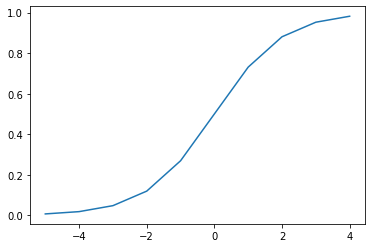

In [13]:
import matplotlib.pyplot as plt
x = range(-5, 5, 1)
y = sigmoid(x)
plt.plot(x,y)

## Initialize with zeros or ones

In [51]:
# use tf.zeros for 0s instead
ones1 = tf.ones(4)
ones2 = tf.ones([4])
ones3 = tf.ones((2,3))
ones4 = tf.ones([2,3])
sess = tf.Session()
ones1 = sess.run(ones1)
ones2 = sess.run(ones2)
ones3 = sess.run(ones3)
ones4 = sess.run(ones4)
sess.close()
print(ones1)
print(ones2)
print(ones3)
print(ones4)

[1. 1. 1. 1.]
[1. 1. 1. 1.]
[[1. 1. 1.]
 [1. 1. 1.]]
[[1. 1. 1.]
 [1. 1. 1.]]


## Define cost and train

In [ ]:
coefficients = np.array([[1.], [-10.], [25.]])
w = tf.Variable(0,dtype=tf.float32)
x = tf.placeholder(tf.float32, [3,1])  #to be used s coefficients of the cost functions
#cost = tf.add(tf.add(w**2, tf.multiply(-10.,w)),25)   # J(w) = w^2-10w+25 = (w-5)^2
#cost = w**2 - 10*w + 25 
cost = x[0][0]*w**2 + x[1][0]*w + x[2][0]  #this is the heart of the program - internally builds a computation graph
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost) # specifies the algo, automatically computes the gradients
init = tf.global_variables_initializer()
session = tf.Session()
session.run(init)
print(session.run(w))
#above three lines can be replaced by the following three lines
# with tf.Session() as session:
#   session.run(init)
#   print(session.run(w))

0.0


In [ ]:
session.run(train, feed_dict={x:coefficients})
print(session.run(w))

0.099999994


In [ ]:
for i in range(1000):
  session.run(train, feed_dict={x:coefficients})
print(session.run(w))

4.999988


## Built-in Functions for computing cost

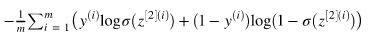

In [72]:
# with placeholders
def compute_cost_v1(z, y):
  # Create the placeholders for "logits" (z) and "labels" (y)
  logits = tf.placeholder(tf.float32, name = "logits")
  labels = tf.placeholder(tf.float32, name = "labels")
  cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = logits, labels = labels)
  sess = tf.Session()
  cost = sess.run(cost, feed_dict = {logits:z, labels:y})
  sess.close()
  return cost

# without placeholders
def compute_cost_v2(z, y):
  # Create the placeholders for "logits" (z) and "labels" (y)
  #logits = tf.placeholder(tf.float32, name = "logits")
  #labels = tf.placeholder(tf.float32, name = "labels")
  cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = z, labels = y)
  sess = tf.Session()
  cost = sess.run(cost)
  sess.close()
  return cost

# without placeholders, with Variables - complains for being uninitialized
def compute_cost_v3(z, y):
  # Create the variables for "logits" (z) and "labels" (y)
  logits = tf.Variable(z, dtype=tf.float32)
  labels = tf.Variable(y, dtype=tf.float32)
  cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = logits, labels = labels)
  sess = tf.Session()
  cost = sess.run(cost)
  sess.close()
  return cost

In [37]:
z = np.array([0.2,0.4,0.7,0.9])
y = np.array([0.,0.,1.,1.])
cost1 = compute_cost_v1(z, y)
cost2 = compute_cost_v2(z, y)
#cost3 = compute_cost_v3(z, y)
print ("cost1 = " + str(cost1))
print ("cost2 = " + str(cost2))
#print ("cost3 = " + str(cost3))

cost1 = [0.79813886 0.91301525 0.40318605 0.34115386]
cost2 = [0.79813887 0.91301525 0.40318605 0.34115387]


## Converting labels to one-hot encoding

In [73]:
# without placeholders
def one_hot_matrix_v1(labels, num_classes):
  one_hot_matrix = tf.one_hot(labels, depth = num_classes, axis = 0)
  sess = tf.Session()
  one_hot = sess.run(one_hot_matrix)
  sess.close()
  return one_hot

# with placeholders
def one_hot_matrix_v2(labels, num_classes):
  lab = tf.placeholder(tf.uint8, name = "lab")
  n = tf.placeholder(tf.int32, name = "n")
  one_hot_matrix = tf.one_hot(lab, depth = n, axis = 0)
  sess = tf.Session()
  one_hot = sess.run(one_hot_matrix, feed_dict={lab:labels, n:num_classes})
  sess.close()
  return one_hot

# with constant, without placeholder
def one_hot_matrix_v3(labels, num_classes):
  C = tf.constant(num_classes, name = 'C')
  one_hot_matrix = tf.one_hot(labels, depth = C, axis = 0)
  sess = tf.Session()
  one_hot = sess.run(one_hot_matrix)
  sess.close()
  return one_hot

def convert_to_one_hot_np(labels, num_classes):
  labels = np.eye(num_classes)[labels.reshape(-1)].T
  return labels

In [74]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix_v1(labels, 4)
one_hotv2 = one_hot_matrix_v2(labels, 4)
one_hotv3 = one_hot_matrix_v3(labels, 4)
one_hotv4 = convert_to_one_hot_np(labels, 4)
print ("one_hot = \n" + str(one_hot))
print ("one_hotv2 = \n" + str(one_hotv2))
print ("one_hotv3 = \n" + str(one_hotv3))
print ("one_hotv4 = \n" + str(one_hotv4))

one_hot = 
[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]
one_hotv2 = 
[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]
one_hotv3 = 
[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]
one_hotv4 = 
[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


# First Neural Network wih TensorFlowv1

## Data

In [2]:
import h5py

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_dataset = h5py.File('/content/drive/MyDrive/andrew_dl_data/train_signs.h5', "r")
X_train_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
Y_train_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('/content/drive/MyDrive/andrew_dl_data/test_signs.h5', "r")
X_test_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
Y_test_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes

Y_train_orig = Y_train_orig.reshape((1, Y_train_orig.shape[0]))
Y_test_orig = Y_test_orig.reshape((1, Y_test_orig.shape[0]))

print("train_set_x_orig's shape = ", X_train_orig.shape)
print("train_set_y_orig's shape = ", Y_train_orig.shape)
print("test_set_x_orig's shape = ", X_test_orig.shape)
print("test_set_y_orig's shape = ", Y_test_orig.shape)
print(classes)

train_set_x_orig's shape =  (1080, 64, 64, 3)
train_set_y_orig's shape =  (1, 1080)
test_set_x_orig's shape =  (120, 64, 64, 3)
test_set_y_orig's shape =  (1, 120)
[0 1 2 3 4 5]


Label of this image =  4


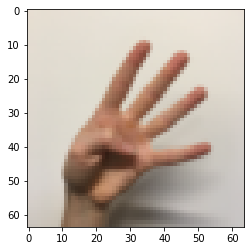

In [5]:
import matplotlib.pyplot as plt
index = 60
plt.imshow(X_train_orig[index])
print("Label of this image = ", str(Y_train_orig[0, index]))

In [6]:
# Flatten the training and test images
num_classes = 6
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
# Normalize image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
# Convert training and test labels to one hot matrices
Y_train = np.eye(num_classes)[Y_train_orig.reshape(-1)].T
Y_test = np.eye(num_classes)[Y_test_orig.reshape(-1)].T
print("X_train's shape = ", X_train.shape)
print("Y_train's shape = ", Y_train.shape)
print("X_test's shape = ", X_test.shape)
print("Y_test's shape = ", Y_test.shape)

X_train's shape =  (12288, 1080)
Y_train's shape =  (6, 1080)
X_test's shape =  (12288, 120)
Y_test's shape =  (6, 120)


## Model

**Model Architecture:**
INPUT (12288) -> LINEAR (25) -> RELU -> LINEAR (12) -> RELU -> LINEAR (6) -> SOFTMAX

In [7]:
def create_placeholders(n_x, n_y):
  # using None allows to keep number of examples flexible - for example num examples in train
  # is different from test
  X = tf.placeholder(shape = [n_x, None], dtype = tf.float32, name = 'X')
  Y = tf.placeholder(shape = [n_y, None], dtype = tf.float32, name = 'Y')
  return X, Y

In [8]:
def initialize_parameters():
  tf.set_random_seed(1)
  W1 = tf.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
  b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
  W2 = tf.get_variable("W2", [12,25], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
  b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
  W3 = tf.get_variable("W3", [6,12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
  b3 = tf.get_variable("b3", [6,1], initializer = tf.zeros_initializer())
  parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
  return parameters

In [9]:
def forward_prop(X, parameters):
  W1 = parameters['W1']
  b1 = parameters['b1']
  W2 = parameters['W2']
  b2 = parameters['b2']
  W3 = parameters['W3']
  b3 = parameters['b3']
  Z1 = tf.add(tf.matmul(W1, X), b1)                    # Z1 = np.dot(W1, X) + b1
  A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
  Z2 = tf.add(tf.matmul(W2, A1), b2)                   # Z2 = np.dot(W2, A1) + b2
  A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
  Z3 = tf.add(tf.matmul(W3, A2), b3) 
  return Z3  #doesn't return any cache

In [10]:
def compute_cost(Z3, Y):
  logits = tf.transpose(Z3)   # because tf.nn.softmax_cross_entropy_with_logits expects (num_examples, num_classes)
  labels = tf.transpose(Y)
  #tf.reduce_mean sums over all examples
  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
  return cost

In [11]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
  m = X.shape[1]                  # number of training examples
  mini_batches = []
  np.random.seed(seed)
  
  # Step 1: Shuffle (X, Y)
  permutation = list(np.random.permutation(m))
  shuffled_X = X[:, permutation]
  shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

  # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
  num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
  for k in range(0, num_complete_minibatches):
      mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
      mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
      mini_batch = (mini_batch_X, mini_batch_Y)
      mini_batches.append(mini_batch)
  
  # Handling the end case (last mini-batch < mini_batch_size)
  if m % mini_batch_size != 0:
      mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
      mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
      mini_batch = (mini_batch_X, mini_batch_Y)
      mini_batches.append(mini_batch)
  
  return mini_batches

## Training

In [17]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
  tf.reset_default_graph()
  tf.set_random_seed(1)
  seed = 3
  (n_x, m) = X_train.shape
  n_y = Y_train.shape[0]
  costs = []
  X, Y = create_placeholders(n_x, n_y)
  parameters = initialize_parameters()
  Z3 = forward_prop(X, parameters)
  cost = compute_cost(Z3, Y)
  optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
  init = tf.global_variables_initializer()
  with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
      epoch_avg_mini_batch_cost = 0.
      num_minibatches = int(m / minibatch_size)
      seed = seed + 1
      minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
      for minibatch in minibatches:
        (minibatch_X, minibatch_Y) = minibatch
        optimizer_val , minibatch_cost = sess.run([optimizer, cost], feed_dict = {X: minibatch_X, Y: minibatch_Y})
        epoch_avg_mini_batch_cost += minibatch_cost / num_minibatches
      if print_cost == True and epoch % 100 == 0:
          print ("Avg mini batch cost after epoch %i: %f" % (epoch, epoch_avg_mini_batch_cost))
      if print_cost == True and epoch % 5 == 0:
          costs.append(epoch_avg_mini_batch_cost)
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per fives)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    parameters = sess.run(parameters)
    print ("Parameters have been trained!")
    num_correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))
    accuracy = tf.reduce_mean(tf.cast(num_correct_prediction, "float"))
    print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))  #equivalent to sess.run(accuracy)
    print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
    return parameters

Avg mini batch cost after epoch 0: 1.855702
Avg mini batch cost after epoch 100: 1.016458
Avg mini batch cost after epoch 200: 0.733102
Avg mini batch cost after epoch 300: 0.572940
Avg mini batch cost after epoch 400: 0.468774
Avg mini batch cost after epoch 500: 0.381021
Avg mini batch cost after epoch 600: 0.313830
Avg mini batch cost after epoch 700: 0.254170
Avg mini batch cost after epoch 800: 0.203811
Avg mini batch cost after epoch 900: 0.166473
Avg mini batch cost after epoch 1000: 0.141147
Avg mini batch cost after epoch 1100: 0.107583
Avg mini batch cost after epoch 1200: 0.086271
Avg mini batch cost after epoch 1300: 0.059375
Avg mini batch cost after epoch 1400: 0.052221


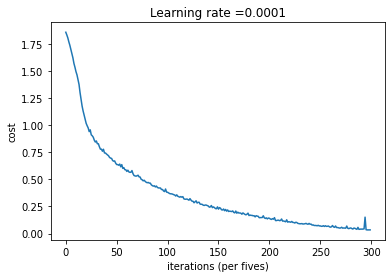

Parameters have been trained!
Train Accuracy: 0.9990741
Test Accuracy: 0.71666664


In [18]:
parameters = model(X_train, Y_train, X_test, Y_test)

## Inference

Label of this image =  2
(64, 64, 3)
(12288, 1)


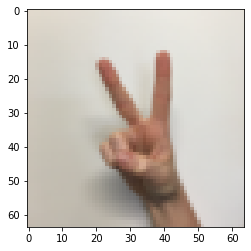

In [31]:
index = 100
test = X_test_orig[index]
plt.imshow(test)
print("Label of this image = ", str(Y_test_orig[0, index]))
print(test.shape)
test = test.reshape(test.shape[0]*test.shape[1]*test.shape[2], 1)
print(test.shape)

In [32]:
x = tf.placeholder("float", [12288, 1])
z3 = forward_prop(x, parameters)
p = tf.argmax(z3)
sess = tf.Session()
prediction = sess.run(p, feed_dict = {x: test})
sess.close()
print("Prediction: ", prediction)

Prediction:  [2]
